## Zad 1.
Zaimplementuj klasę `GaussianKDE` do estymacji gęstości prawdopodobieństwa przy użyciu kernela gausowskiego. Klasa powinna:
- przyjmować dane treningowe i opcjonalną szerokość pasma (bandwidth),
- implementować funkcję gęstości prawdopodobieństwa (PDF) używając kernela gausowskiego,
- automatycznie dobierać szerokość pasma według reguły Silvermana (nie zapomnij o IQR) gdy nie jest podana,
- obliczać logarytmiczną funkcję wiarygodności na zbiorze testowym.

Porównaj wyniki z metodą `gaussian_kde` z biblioteki `scipy.stats`, tworząc wykresy.

Bandwidth: 0.10, Log-likelihood: -341.3700
Bandwidth: 0.50, Log-likelihood: -327.0865
Bandwidth: 1.00, Log-likelihood: -336.6563
Bandwidth: 2.00, Log-likelihood: -363.1098


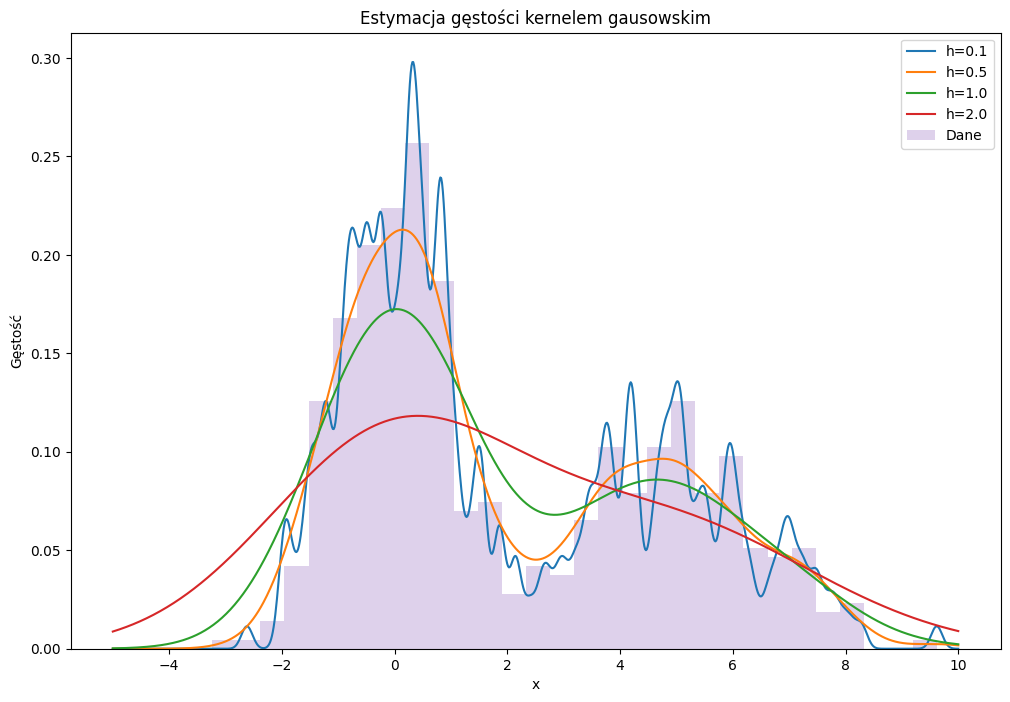

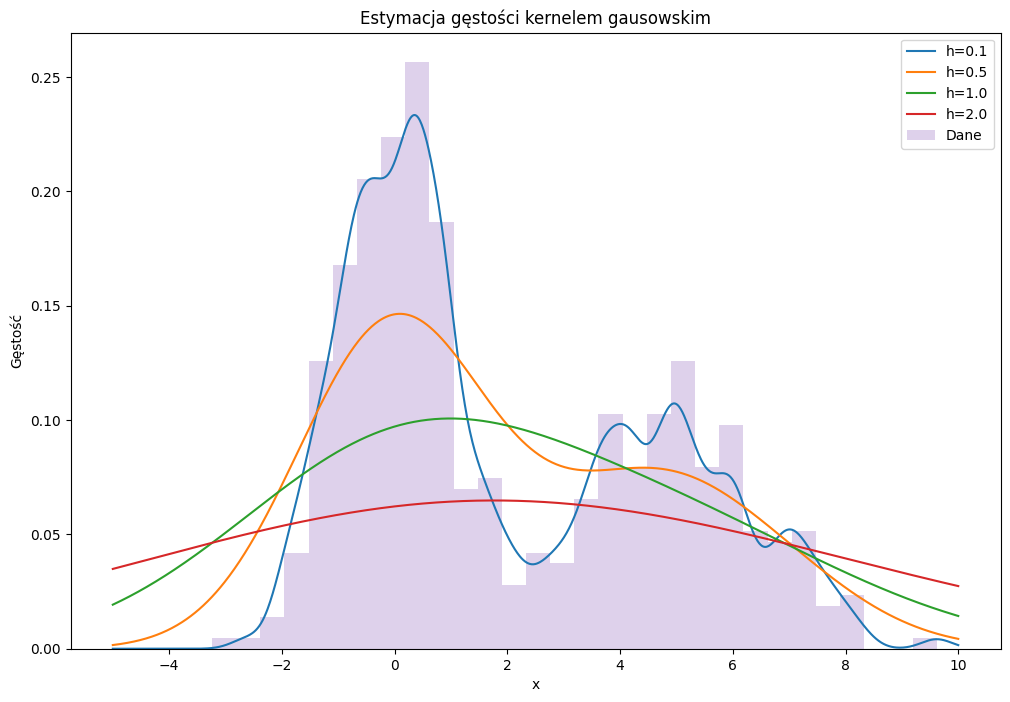

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde
from sklearn.model_selection import train_test_split


class GaussianKDE:
    def __init__(self, bandwidth=None):
        self.bandwidth = bandwidth
        self.data = None
        
    def fit(self, data):
        pass
    
    def pdf(self, x):
        pass
    
    def log_likelihood(self, x):
        pass




np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 300), np.random.normal(5, 1.5, 200)])

# Podział na zbiór treningowy i walidacyjny
train_data, val_data = train_test_split(data, test_size=0.3, random_state=42)

# Estymacja z różnymi szerokościami
bandwidths = [0.1, 0.5, 1.0, 2.0]
log_likelihoods = []

for bw in bandwidths:
    kde = GaussianKDE(bandwidth=bw)
    kde.fit(train_data)
    ll = kde.log_likelihood(val_data)
    log_likelihoods.append(ll)
    print(f"Bandwidth: {bw:.2f}, Log-likelihood: {ll:.4f}")

# Wizualizacja
x_plot = np.linspace(-5, 10, 1000)
plt.figure(figsize=(12, 8))

for bw in bandwidths:
    kde = GaussianKDE(bandwidth=bw)
    kde.fit(train_data)
    plt.plot(x_plot, kde.pdf(x_plot), label=f'h={bw}')

plt.hist(data, density=True, alpha=0.3, bins=30, label='Dane')
plt.xlabel('x')
plt.ylabel('Gęstość')
plt.legend()
plt.title('Estymacja gęstości kernelem gausowskim')
plt.show()

# -------------------------------------------------------

# gaussian_kde - napisać

### Zad 2.
Rozszerz klasę `GaussianKDE` o metodę optymalizacji szerokości pasma przy użyciu walidacji krzyżowej `Leave-One-Out (LOO)`. Zaimplementuj:
- metodę `loo_log_likelihood()` obliczającą log-wiarygodność LOO,
- metodę `find_optimal_bandwidth()` znajdującą optymalną szerokość pasma (przeszukaj zakres w $[0.1\cdot\sigma, 2\cdot\sigma]$),
- porównanie z regułą Silvermana na syntetycznych danych.

In [ ]:
class OptimizedGaussianKDE(GaussianKDE):
    def loo_log_likelihood(self, bandwidth):
        pass
    
    def find_optimal_bandwidth(self):
        pass

Optymalna szerokość: 0.4199
LOO log-likelihood: -135.3665
Silverman bandwidth: 0.3171


### Zad 3.
Niech $K(x) = \frac{1}{2}\exp(−|x|)$. Wygeneruj próbkę $\{x_i\}^{i=n}_{i=0}$, gdzie $n=10000$ z rozkładu normalnego. Narysuj funkcję 
$$
f(z) = \sum_{i}K(\frac{z - x_i}{h}) \;\text{dla}\; h>0 \quad (1)
$$
oraz posortowanych wartości $\{x_i\}$. Porównaj wykres z poniższą funkcją:
$$
f(z)=\frac{a_i}{2} \exp(\frac{z-x_i}{h})+\frac{b_i}{2}\exp(\frac{x_{i-1}-z}{h}), \quad (2)
$$
gdzie 
$$
a_i = \sum_{l=i}^{n-1}\exp(\frac{x_i - x_l}{h})
$$,
$$
b_i = \sum_{l=0}^{i-1}\exp(\frac{x_l - x_{i-1}}{h})
$$.

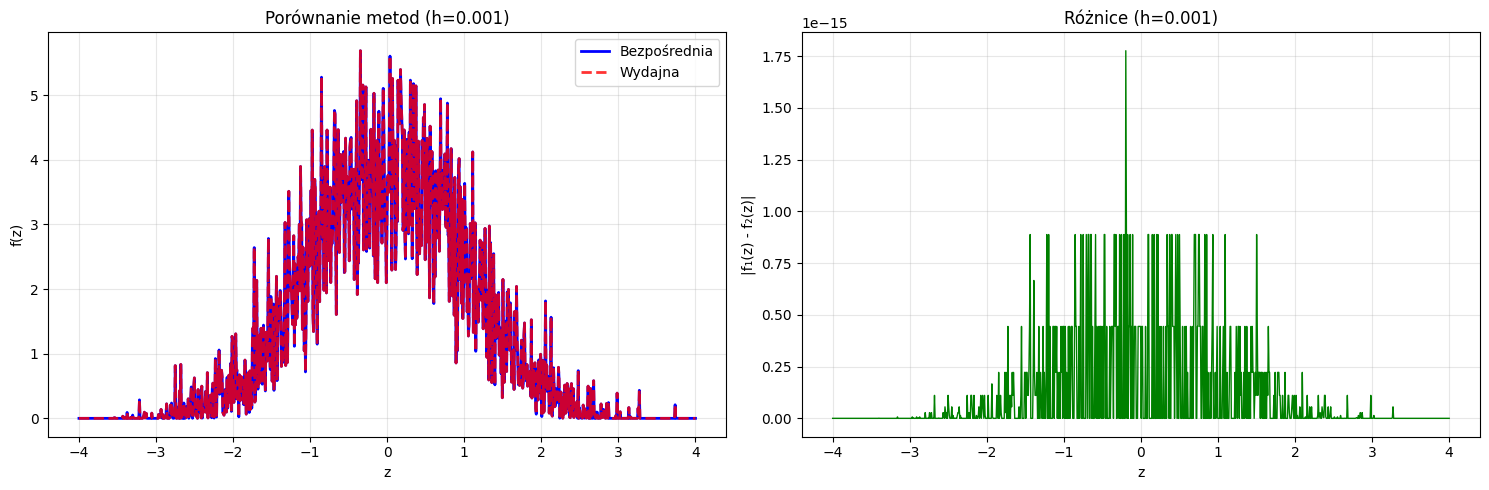

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def K(u):
    ...
    
def fun1(z, x, h): # wg wzoru (1)
    ...
    
def fun2(z, x_sorted, h): # wg wzoru (2) 
    ...
    
n = 10000
np.random.seed(4) # można zmienić w razie potrzeby




### Zad 4.
Zaimplementuj funkcję `logcumsumexp()` obliczającą skumulowaną sumę w przestrzeni logarytmicznej w sposób stabilny numerycznie.
- zaimplementuj stabilny algorytm używając *log-sum-exp* trick:
  $$
    \log(\sum_i\exp(x_i)) = m + \log(\sum_i\exp(x_i - m)), \;\text{gdzie}\; m = \max(x_i),
  $$
- porównaj z naiwną implementacją na danych z dużymi wartościami.

In [ ]:
def logcumsumexp(x):
    """
    Oblicza skumulowaną sumę w przestrzeni logarytmicznej
    dla stabilności numerycznej
    """
    ...


def naive_logcumsumexp(x):
    """Naiwna implementacja dla porównania (niestabilna numerycznie)"""
    ...


# x = [-0.5286, -1.1680, -1.3139, -0.6027, -0.9929,  0.8028,  0.1587, -1.4979, 1.3812,  0.5417]
x = np.array([1000, 1001, 1002, 1003])

print("Wejście:", x)
print("logcumsumexp (stabilna):", logcumsumexp(x))
print("Naive logcumsumexp (niestabilna):", naive_logcumsumexp(x))

# Test na większym zbiorze danych
large_x = np.random.normal(0, 10, 1000)
stable_result = logcumsumexp(large_x)
naive_result = naive_logcumsumexp(large_x)

print(f"\nMaksymalna różnica: {np.max(np.abs(stable_result - naive_result)):.2e}")

Wejście: [1000 1001 1002 1003]
logcumsumexp (stabilna): [1000 1001 1002 1003]
Naive logcumsumexp (niestabilna): [inf inf inf inf]

Maksymalna różnica: 3.55e-14


/tmp/ipykernel_63567/2822477117.py:22: RuntimeWarning: overflow encountered in exp
  exp_x = np.exp(x)


### Zad 5.
Zaimplementuj sekwencyjnego prefix scana dla operacji dodawania i mnożenia dla tablic jednowymiarowych. Dodatkowo, zaimplementuj równoległy prefix-scan dla tablic 1D, używając algorytmu Hillis–Steele. Porównaj czas wykonania obu implementacji na dużej, losowej tablicy wejściowej 1D — w implementacji z użyciem algorytmu Hillis–Steele użyj biblioteki wspierającej zrównoleglanie (np. multiprocessing, joblib, numba prange, Dask, OpenMP itp.).

In [ ]:
from typing import List, Union, Callable
import numpy as np


def prefix_scan_1d(arr: List[Union[int, float]], operation: Callable) -> List[Union[int, float]]:
    ...


def hillis_steele_prefix_scan_1d(arr: List[Union[int, float]], operation: Callable = lambda x, y: x + y) -> List[Union[int, float]]:
    ...



# Przykłady użycia dla 1D
arr_1d = [2, 3, 1, 5, 4]

print(f"Array: {arr_1d}")
print(f"Sum Scan: {prefix_scan_1d(arr_1d, lambda x, y: x + y)}")
print(f"Sum Scan: {hillis_steele_prefix_scan_1d(arr_1d, lambda x, y: x + y)}")
print()
print(f"Product Scan: {prefix_scan_1d(arr_1d, lambda x, y: x * y)}")
print(f"Product Scan: {hillis_steele_prefix_scan_1d(arr_1d, lambda x, y: x * y)}")

Array: [2, 3, 1, 5, 4]
Sum Scan: [2, 5, 6, 11, 15]
Rozpoczynanie algorytmu Hillis-Steele dla 5 elementów, 3 kroków
Krok 0: [2, 3, 1, 5, 4]
Krok 1 (stride=1): [2, 5, 4, 6, 9]
Krok 2 (stride=2): [2, 5, 6, 11, 13]
Krok 3 (stride=4): [2, 5, 6, 11, 15]
Sum Scan: [2, 5, 6, 11, 15]

Product Scan: [2, 6, 6, 30, 120]
Rozpoczynanie algorytmu Hillis-Steele dla 5 elementów, 3 kroków
Krok 0: [2, 3, 1, 5, 4]
Krok 1 (stride=1): [2, 6, 3, 5, 20]
Krok 2 (stride=2): [2, 6, 6, 30, 60]
Krok 3 (stride=4): [2, 6, 6, 30, 120]
Product Scan: [2, 6, 6, 30, 120]
